In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://Deep_learning//ResNetIC50_log//Dataset//MEYODC-6K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "//MEYODC6K_dataset.npz") # input file
ss0 = np.load(workdir + '//MEYODC6K_dataset_r0.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 5


In [6]:
x.shape

(6050, 79724)

In [7]:
training_image_array.shape

(5445, 79724)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5445, 79724) (5445,) (605, 79724) (605,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (5445, 79724)
5445 train samples
605 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([1.96794099, 1.97082004, 1.97769116, 1.94931165, 1.98222542,
       1.97676002, 1.97917237, 1.95553943, 1.96963201, 1.94974217,
       1.88608837, 1.95477348, 1.97478414, 1.97875367, 1.97485855,
       1.9797665 , 1.97453571, 1.97004581, 1.97689732, 1.95615851,
       1.98241004, 1.95911364, 1.98135634, 1.87099567, 1.96409535,
       1.98128248, 1.97283494, 1.94208018, 1.96615272, 1.96540303,
       1.95561891, 1.93735791, 1.97350293, 1.97704664, 1.97831716,
       1.98163629, 1.97943886, 1.9792625 , 1.97608952, 1.9651487 ,
       1.9408237 , 1.9727419 , 1.9733251 , 1.98101081, 1.96595737,
       1.97129226, 1.97599606, 1.95938205, 1.97964624, 1.87775886,
       1.94835923, 1.9738536 , 1.97600815, 1.95774508, 1.97843259,
       1.97972023, 1.9839208 , 1.92836378, 1.96046675, 1.97357468,
       1.97541518, 1.96289769, 1.97584755, 1.97677456, 1.97548223,
       1.96486952, 1.97810996, 1.98180029, 1.98096899, 1.98181192,
       1.97018447, 1.97952912, 1.94797421, 1.97769411, 1.87776

In [17]:
import pickle
import joblib
workdir = "D://Deep_learning//ResNetIC50_log//Result//MEYODC-6K//SVR"
joblib.dump(svr_lin, workdir + '//MEYODC6K_SVR_model.pkl') 


['D://Deep_learning//ResNetIC50_log//Result//MEYODC-6K//SVR//MEYODC6K_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//MEYODC6K_SVR_pred_obs_table.csv')

In [20]:
c

,Predicted,Test
0,1.967941,-2.530241
1,1.970820,2.079442
2,1.977691,2.079442
3,1.949312,-5.687074
4,1.982225,2.079442
...,...,...
600,1.975425,2.079442
601,1.979103,2.079442
602,1.979575,2.079442
603,1.881631,-5.046103


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.004202682721659647, intercept=1.958681578335556, rvalue=0.32183157640807347, pvalue=4.795608369076422e-16, stderr=0.0005034961329355324)

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.27261729976680016


In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.1173786543344897


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


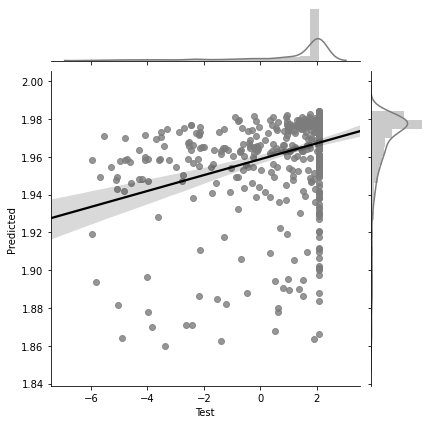

In [24]:
workdir = "D://Deep_learning//ResNetIC50_log//Figure//Backbone//MEYODC-6K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MEYODC6K_SVR.png', dpi=300)